In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

from tensorflow import keras
print("versão do Keras:", keras.__version__)

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import h5py
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import Sequential
from keras import layers
from keras.layers import Dropout

Versão do TensorFlow: 2.1.0
versão do Keras: 2.2.4-tf


Using TensorFlow backend.


In [2]:
# Criando modelo

model = keras.models.load_model('model.h5')
model.pop()
model.pop()
model.pop()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 11, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

In [3]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [4]:
from functions_extras import criar_treino_teste

In [5]:
criar_treino_teste('./dataset_smkt/', 0.3)

Criando particionamento
	 140 	+ 61 	= 201 	 -> agata_potato
	 147 	+ 64 	= 211 	 -> diamond_peach
	 148 	+ 64 	= 212 	 -> fuji_apple
	 108 	+ 47 	= 155 	 -> granny_smith_apple
	 119 	+ 52 	= 171 	 -> kiwi
	 172 	+ 75 	= 247 	 -> nectarine
	 52 	+ 23 	= 75 	 -> onion
	 184 	+ 80 	= 264 	 -> plum
	 111 	+ 48 	= 159 	 -> spanish_pear
	 74 	+ 32 	= 106 	 -> taiti_lime
	 134 	+ 58 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [6]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/train',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

Found 1117 images belonging to 11 classes.
Found 272 images belonging to 11 classes.


In [7]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 11)

In [8]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 18 steps, validate for 5 steps
Epoch 1/100
18/18 [==============================] - 27s 1s/step - loss: 2.0601 - accuracy: 0.3545 - val_loss: 1.6397 - val_accuracy: 0.4596
Epoch 2/100
18/18 [==============================] - 22s 1s/step - loss: 1.1667 - accuracy: 0.5927 - val_loss: 1.3998 - val_accuracy: 0.5331
Epoch 3/100
18/18 [==============================] - 24s 1s/step - loss: 0.8793 - accuracy: 0.6974 - val_loss: 1.2033 - val_accuracy: 0.6507
Epoch 4/100
18/18 [==============================] - 22s 1s/step - loss: 0.6773 - accuracy: 0.7690 - val_loss: 1.0574 - val_accuracy: 0.7206
Epoch 5/100
18/18 [==============================] - 21s 1s/step - loss: 0.5453 - accuracy: 0.8236 - val_loss: 0.8972 - val_accuracy: 0.6949
Epoch 6/100
18/18 [==============================] - 22s 1s/step - loss: 0.4605 - accuracy: 0.8487 - val_loss: 0.7978 - val_accuracy: 0.6838
Epoch 7/100
18/18 [==============================] - 25s 1s/ste

In [9]:
model.save('model_comando_pop.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_comando_pop', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
model_comando_pop = keras.models.load_model('model_comando_pop.h5')
history = pickle.load(open('trainHistoryDict_model_comando_pop', "rb"))

In [11]:
model_comando_pop.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

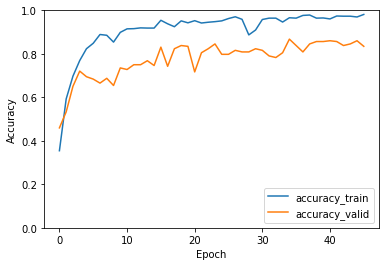

In [12]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

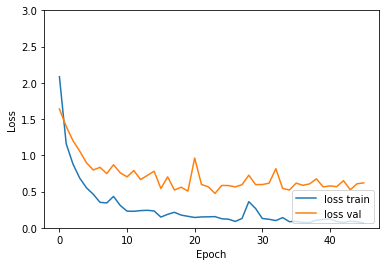

In [13]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [14]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=False)

Found 604 images belonging to 11 classes.


In [15]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_comando_pop.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

  ...
    to  
  ['...']
604/604 [==============================] - 8s 13ms/step - loss: 0.1313 - accuracy: 0.9487
acurácia nos dados de teste: 0.9486755
loss dos dados de teste: 0.13131145670058936


In [16]:
Y_pred = model_comando_pop.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(604,)
Accuracy
0.9486754966887417
Balanced Accuracy
0.9498033442648743
Confusion Matrix
[[57  0  0  0  0  0  0  0  4  0  0]
 [ 0 50 10  0  0  2  0  0  2  0  0]
 [ 0  1 62  0  0  0  0  0  1  0  0]
 [ 0  0  0 45  0  0  0  0  0  0  2]
 [ 0  0  0  0 50  2  0  0  0  0  0]
 [ 0  0  1  0  0 74  0  0  0  0  0]
 [ 0  0  0  0  0  0 23  0  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0  0]
 [ 0  2  0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0  0  0 30  2]
 [ 1  0  0  0  0  0  0  0  0  0 57]]
Classification Report


# 